# Ground water level prediction
## Md. Abdullah-Al Mamun
## Mst Nazneen Aktar


# Exploratory data analysis

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
temp_df= pd.read_excel('D:\Jupyter\Ground water level prediction(Towfiq Sir)\Final Dataset_GWL\Final_temp_three_location.xlsx')  # Specify the header row number
temp_df


,Year,Month,Tave_Rangpur,Tave_Sayedpur,Tave_Dinajpur
0,1993,1,15.1,16.5,14.8
1,1993,2,19.7,21.3,20.1
2,1993,3,22.1,24.9,22.6
3,1993,4,25.4,26.3,26.2
4,1993,5,26.4,29.3,26.8
...,...,...,...,...,...
295,2017,8,31.5,28.0,32.5
296,2017,9,30.6,30.5,31.9
297,2017,10,28.4,27.4,30.4
298,2017,11,27.6,22.2,28.6


In [10]:
info = GWL_df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           300 non-null    int64  
 1   Month                                          300 non-null    int64  
 2   Rangpur-27 Satgora Mistripara (Rangpur Sadar)  300 non-null    float64
 3   Rangpur-28 (Aviram dakhin panapukur)           300 non-null    float64
 4   Rangpur-61 (Mithapikur)                        300 non-null    float64
 5   Saidpur-29 (Nilphamari)                        300 non-null    float64
 6   Saidpur-30 ( Nilphamari)                       300 non-null    float64
 7   Saidpur-44 (Nilphamari, Sadar)                 300 non-null    float64
 8   Saidpur-54 (Nilphamari)                        300 non-null    float64
 9   Dinajpur-34 (Dinajpur Sadar)                   300 non

In [12]:
description_data = round(GWL_df.iloc[:, 2:].describe(), 2)
description_data

,Rangpur-27 Satgora Mistripara (Rangpur Sadar),Rangpur-28 (Aviram dakhin panapukur),Rangpur-61 (Mithapikur),Saidpur-29 (Nilphamari),Saidpur-30 ( Nilphamari),"Saidpur-44 (Nilphamari, Sadar)",Saidpur-54 (Nilphamari),Dinajpur-34 (Dinajpur Sadar),Dinajpur-38 ( Birgang),Dinajpur-57 (Phulbari),"Dinajpur-63 (Tazpur, Chirir Bandar)","Dinajpur-64 (Amtolihat, Chirir Bandar)"
count,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00
mean,3.09,3.03,3.56,3.53,3.95,2.56,3.81,4.51,3.57,6.13,6.44,6.09
std,0.66,0.77,1.26,1.05,0.52,0.82,0.64,0.67,1.19,1.53,4.28,10.51
min,1.21,1.52,1.30,1.32,1.52,0.81,2.05,1.94,1.23,2.42,1.75,1.85
25%,2.65,2.44,2.53,2.76,3.73,1.93,3.39,4.03,2.63,4.93,4.27,5.04
50%,3.13,3.04,3.43,3.54,3.91,2.52,3.84,4.55,3.54,6.04,6.17,5.55
75%,3.55,3.58,4.52,4.18,4.10,3.07,4.19,4.93,4.38,7.33,8.03,6.02
max,4.75,6.06,7.11,6.68,5.52,5.08,6.86,6.08,6.54,9.31,66.82,186.98


In [13]:
# Checking the missing values in each coulmn
missing_values = GWL_df.isnull().sum()
missing_values

Year                                             0
Month                                            0
Rangpur-27 Satgora Mistripara (Rangpur Sadar)    0
Rangpur-28 (Aviram dakhin panapukur)             0
Rangpur-61 (Mithapikur)                          0
Saidpur-29 (Nilphamari)                          0
Saidpur-30 ( Nilphamari)                         0
Saidpur-44 (Nilphamari, Sadar)                   0
Saidpur-54 (Nilphamari)                          0
Dinajpur-34 (Dinajpur Sadar)                     0
Dinajpur-38 ( Birgang)                           0
Dinajpur-57 (Phulbari)                           0
Dinajpur-63 (Tazpur, Chirir Bandar)              0
Dinajpur-64 (Amtolihat, Chirir Bandar)           0
dtype: int64

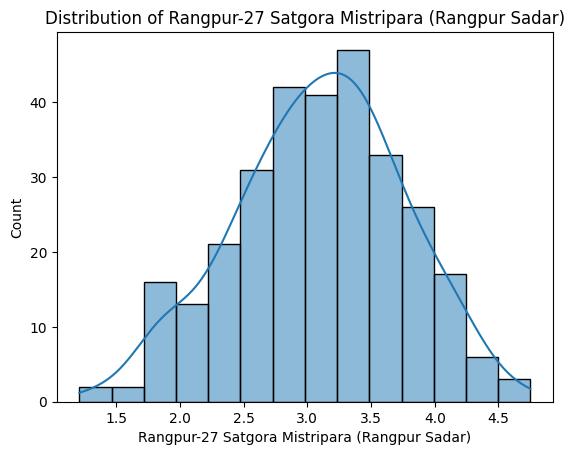

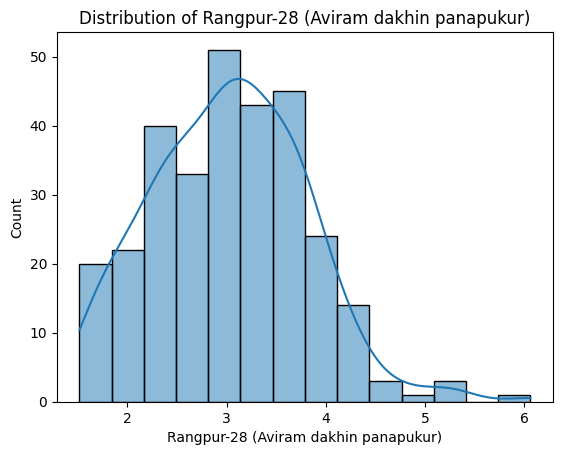

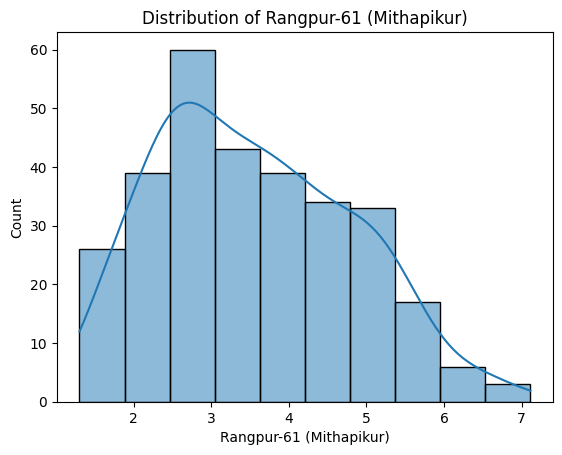

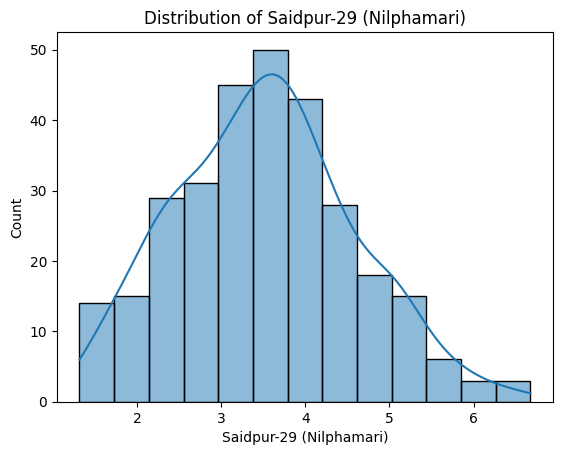

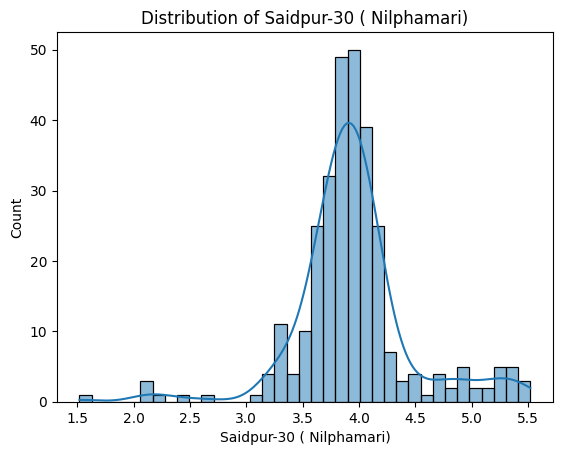

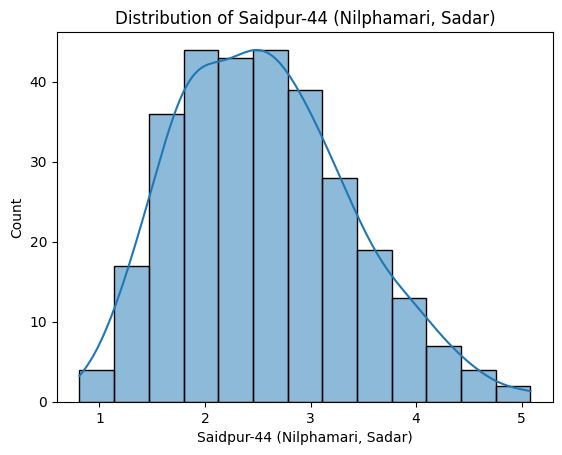

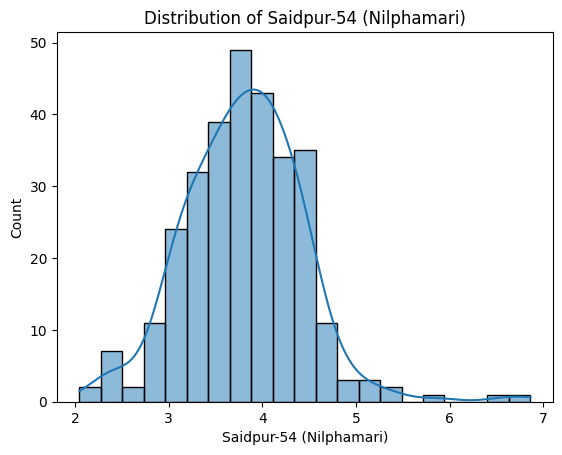

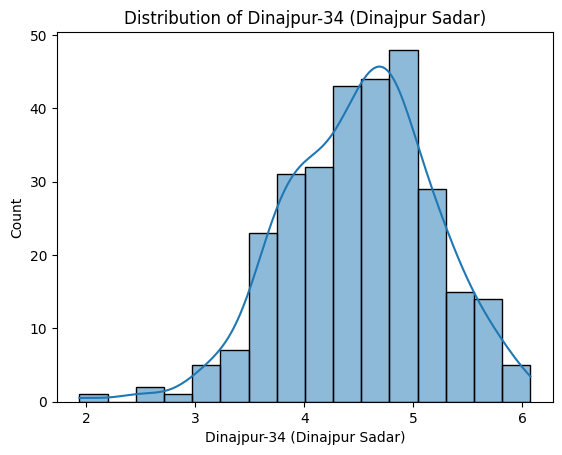

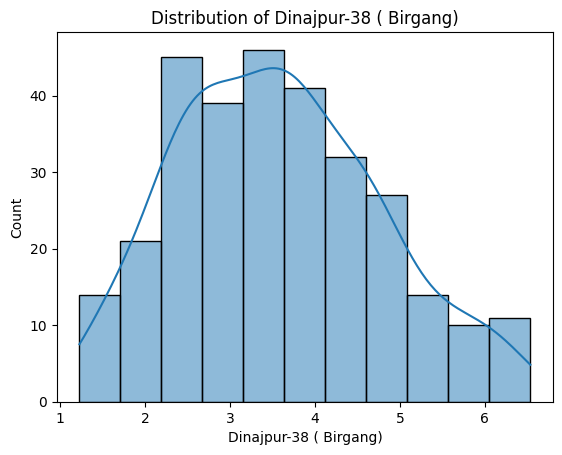

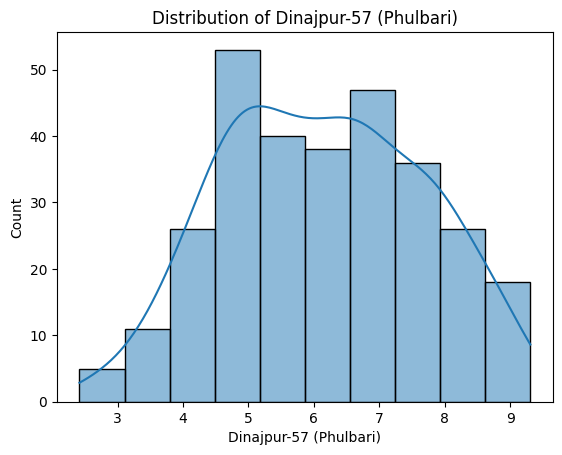

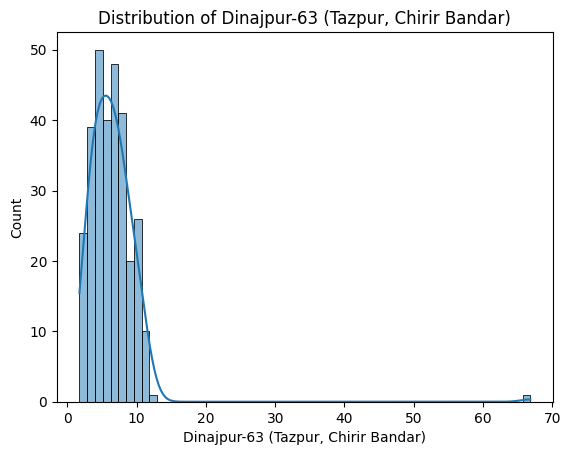

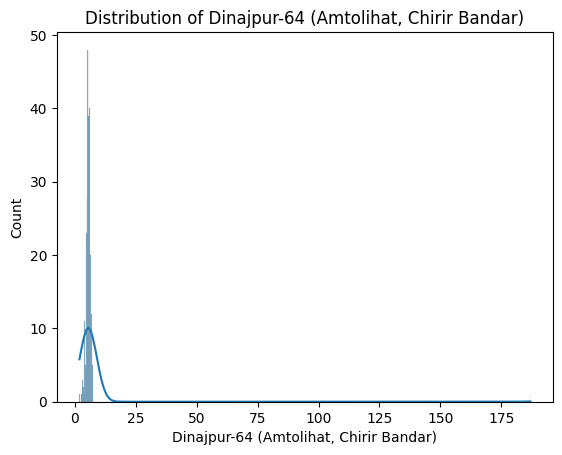

In [15]:
def plot_distribution(GWL_df):
    for column in GWL_df.columns:
        sns.histplot(GWL_df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()

plot_distribution(GWL_df.iloc[:, 2:])

In [18]:
correlation_matrix = GWL_df.corr()
correlation_matrix

,Year,Month,Rangpur-27 Satgora Mistripara (Rangpur Sadar),Rangpur-28 (Aviram dakhin panapukur),Rangpur-61 (Mithapikur),Saidpur-29 (Nilphamari),Saidpur-30 ( Nilphamari),"Saidpur-44 (Nilphamari, Sadar)",Saidpur-54 (Nilphamari),Dinajpur-34 (Dinajpur Sadar),Dinajpur-38 ( Birgang),Dinajpur-57 (Phulbari),"Dinajpur-63 (Tazpur, Chirir Bandar)","Dinajpur-64 (Amtolihat, Chirir Bandar)"
Year,1.000000e+00,4.492787e-15,-0.023099,0.137586,0.376699,-0.248533,-0.341047,0.310545,0.095504,0.306183,0.454304,0.596669,0.221839,0.035796
Month,4.492787e-15,1.000000e+00,-0.450298,-0.456348,-0.455781,-0.364576,-0.179120,-0.504187,-0.379207,-0.355233,-0.394209,-0.342650,-0.193764,-0.079794
Rangpur-27 Satgora Mistripara (Rangpur Sadar),-2.309931e-02,-4.502979e-01,1.000000,0.683564,0.633843,0.566090,0.367860,0.740383,0.712806,0.658433,0.633373,0.546796,0.363686,0.043885
Rangpur-28 (Aviram dakhin panapukur),1.375860e-01,-4.563475e-01,0.683564,1.000000,0.756964,0.514580,0.086304,0.719658,0.719761,0.464993,0.539472,0.362706,0.293818,0.102130
Rangpur-61 (Mithapikur),3.766986e-01,-4.557813e-01,0.633843,0.756964,1.000000,0.351438,0.025575,0.821183,0.656272,0.555897,0.699051,0.526495,0.369193,0.045448
Saidpur-29 (Nilphamari),-2.485332e-01,-3.645764e-01,0.566090,0.514580,0.351438,1.000000,0.416474,0.507765,0.485704,0.359047,0.240338,0.242739,0.248059,0.077424
Saidpur-30 ( Nilphamari),-3.410470e-01,-1.791198e-01,0.367860,0.086304,0.025575,0.416474,1.000000,0.249142,0.337916,0.242730,0.036657,0.202550,0.063352,-0.006259
"Saidpur-44 (Nilphamari, Sadar)",3.105454e-01,-5.041870e-01,0.740383,0.719658,0.821183,0.507765,0.249142,1.000000,0.759800,0.641760,0.689757,0.669003,0.387537,0.078892
Saidpur-54 (Nilphamari),9.550408e-02,-3.792069e-01,0.712806,0.719761,0.656272,0.485704,0.337916,0.759800,1.000000,0.497780,0.483781,0.386570,0.279902,0.045989
Dinajpur-34 (Dinajpur Sadar),3.061834e-01,-3.552334e-01,0.658433,0.464993,0.555897,0.359047,0.242730,0.641760,0.497780,1.000000,0.749698,0.754330,0.413801,0.106219


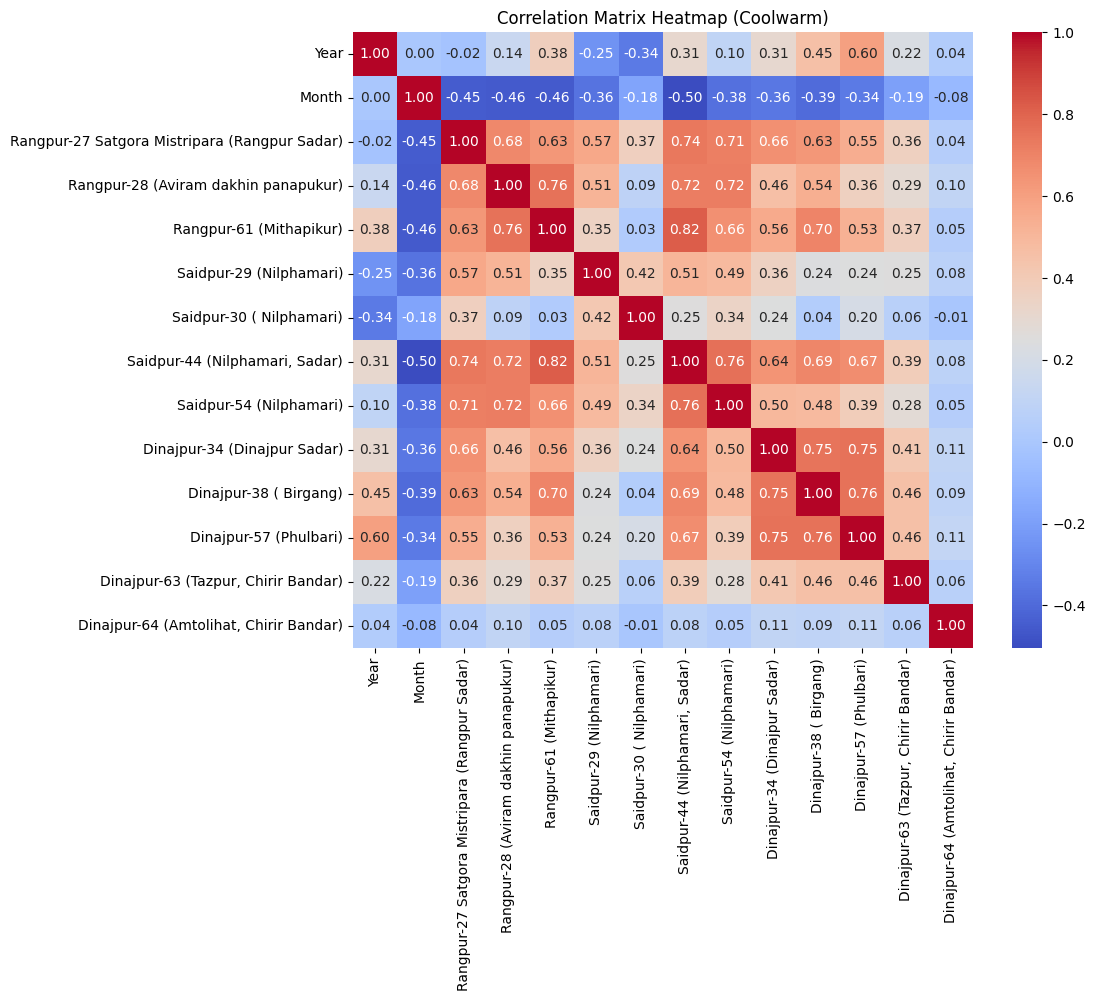

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming GWL_df is your DataFrame
correlation_matrix = GWL_df.corr()

# Create a heatmap with the "coolwarm" color palette
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap (Coolwarm)")
plt.show()


D:\Jupyter\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


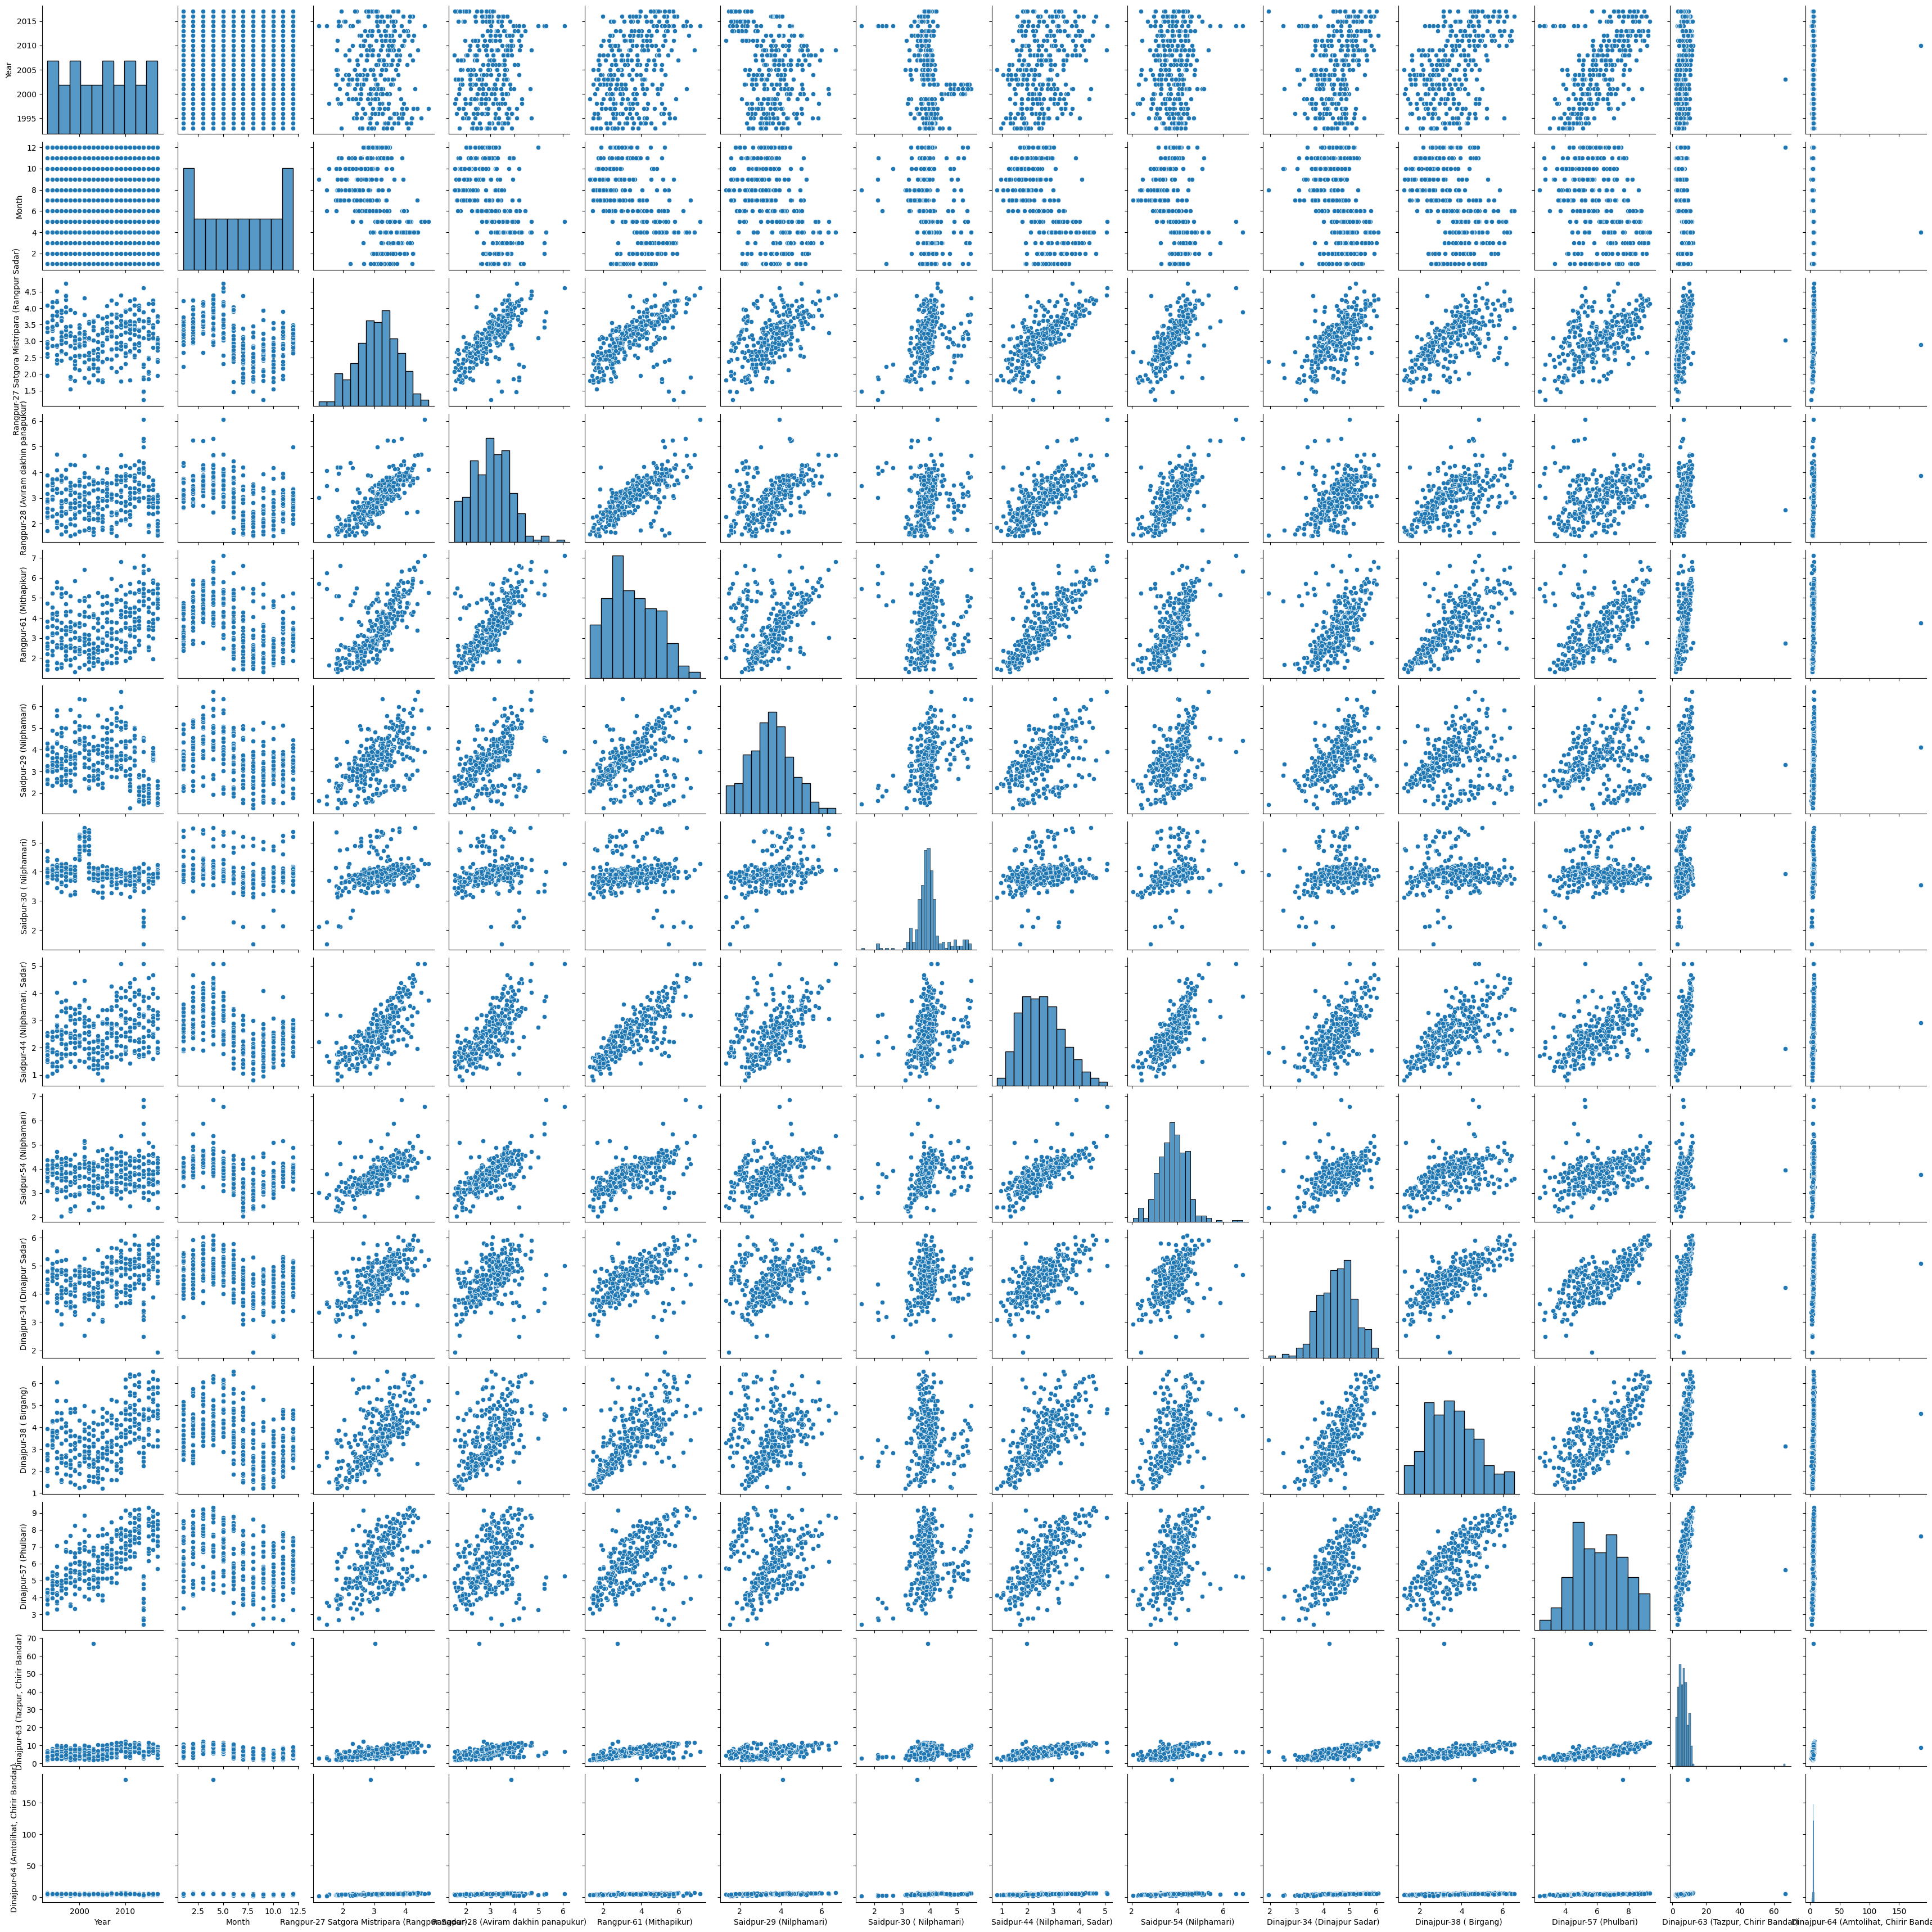

In [21]:
sns.pairplot(GWL_df)
plt.show()

In [22]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(GWL_df)

# Called the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [23]:
checker.check_missing_values()

No missing values found in DataFrame


In [25]:
def plot_boxplot_with_outliers(data):
    plt.figure(figsize=(14, 8))
    numeric_columns = data.select_dtypes(include=np.number).columns
    bp = plt.boxplot(data[numeric_columns].values, showfliers=False)
    plt.title('Boxplot')
    plt.ylabel('Values')

    for j, column in enumerate(numeric_columns, 1):
        column_values = data[column].values
        q1 = np.nanpercentile(column_values, 25)
        q3 = np.nanpercentile(column_values, 75)
        iqr = q3 - q1
        outlier_threshold = 1.5 * iqr
        column_outliers = column_values[((column_values < q1 - outlier_threshold) | (column_values > q3 + outlier_threshold))]
        for outlier in column_outliers:
            plt.plot(j, outlier, 'ro', label='Outlier')

    plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation='vertical')  
    plt.tight_layout() 
    plt.show()


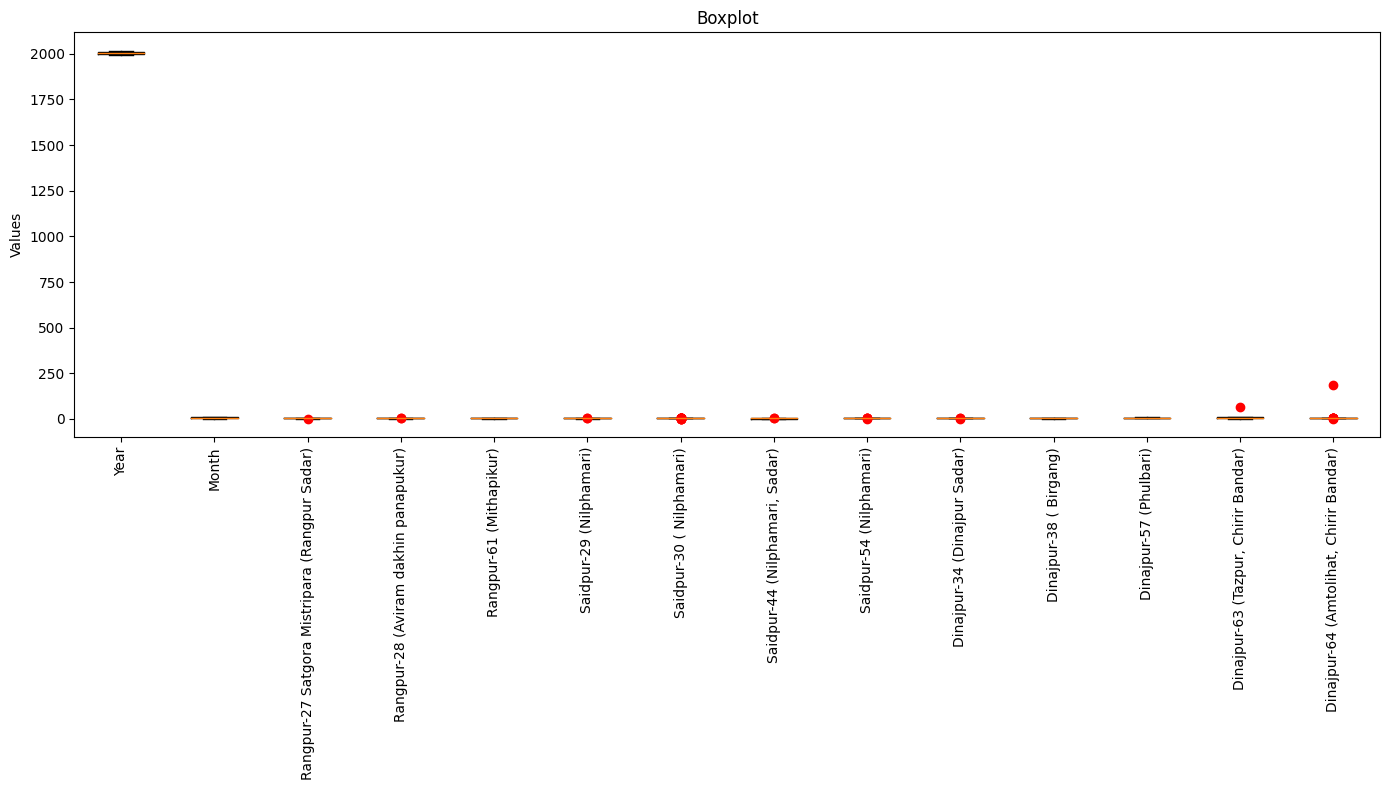

In [26]:
plot_boxplot_with_outliers(GWL_df)

In [27]:
import warnings
from scipy import stats


def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers


In [28]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculate the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')


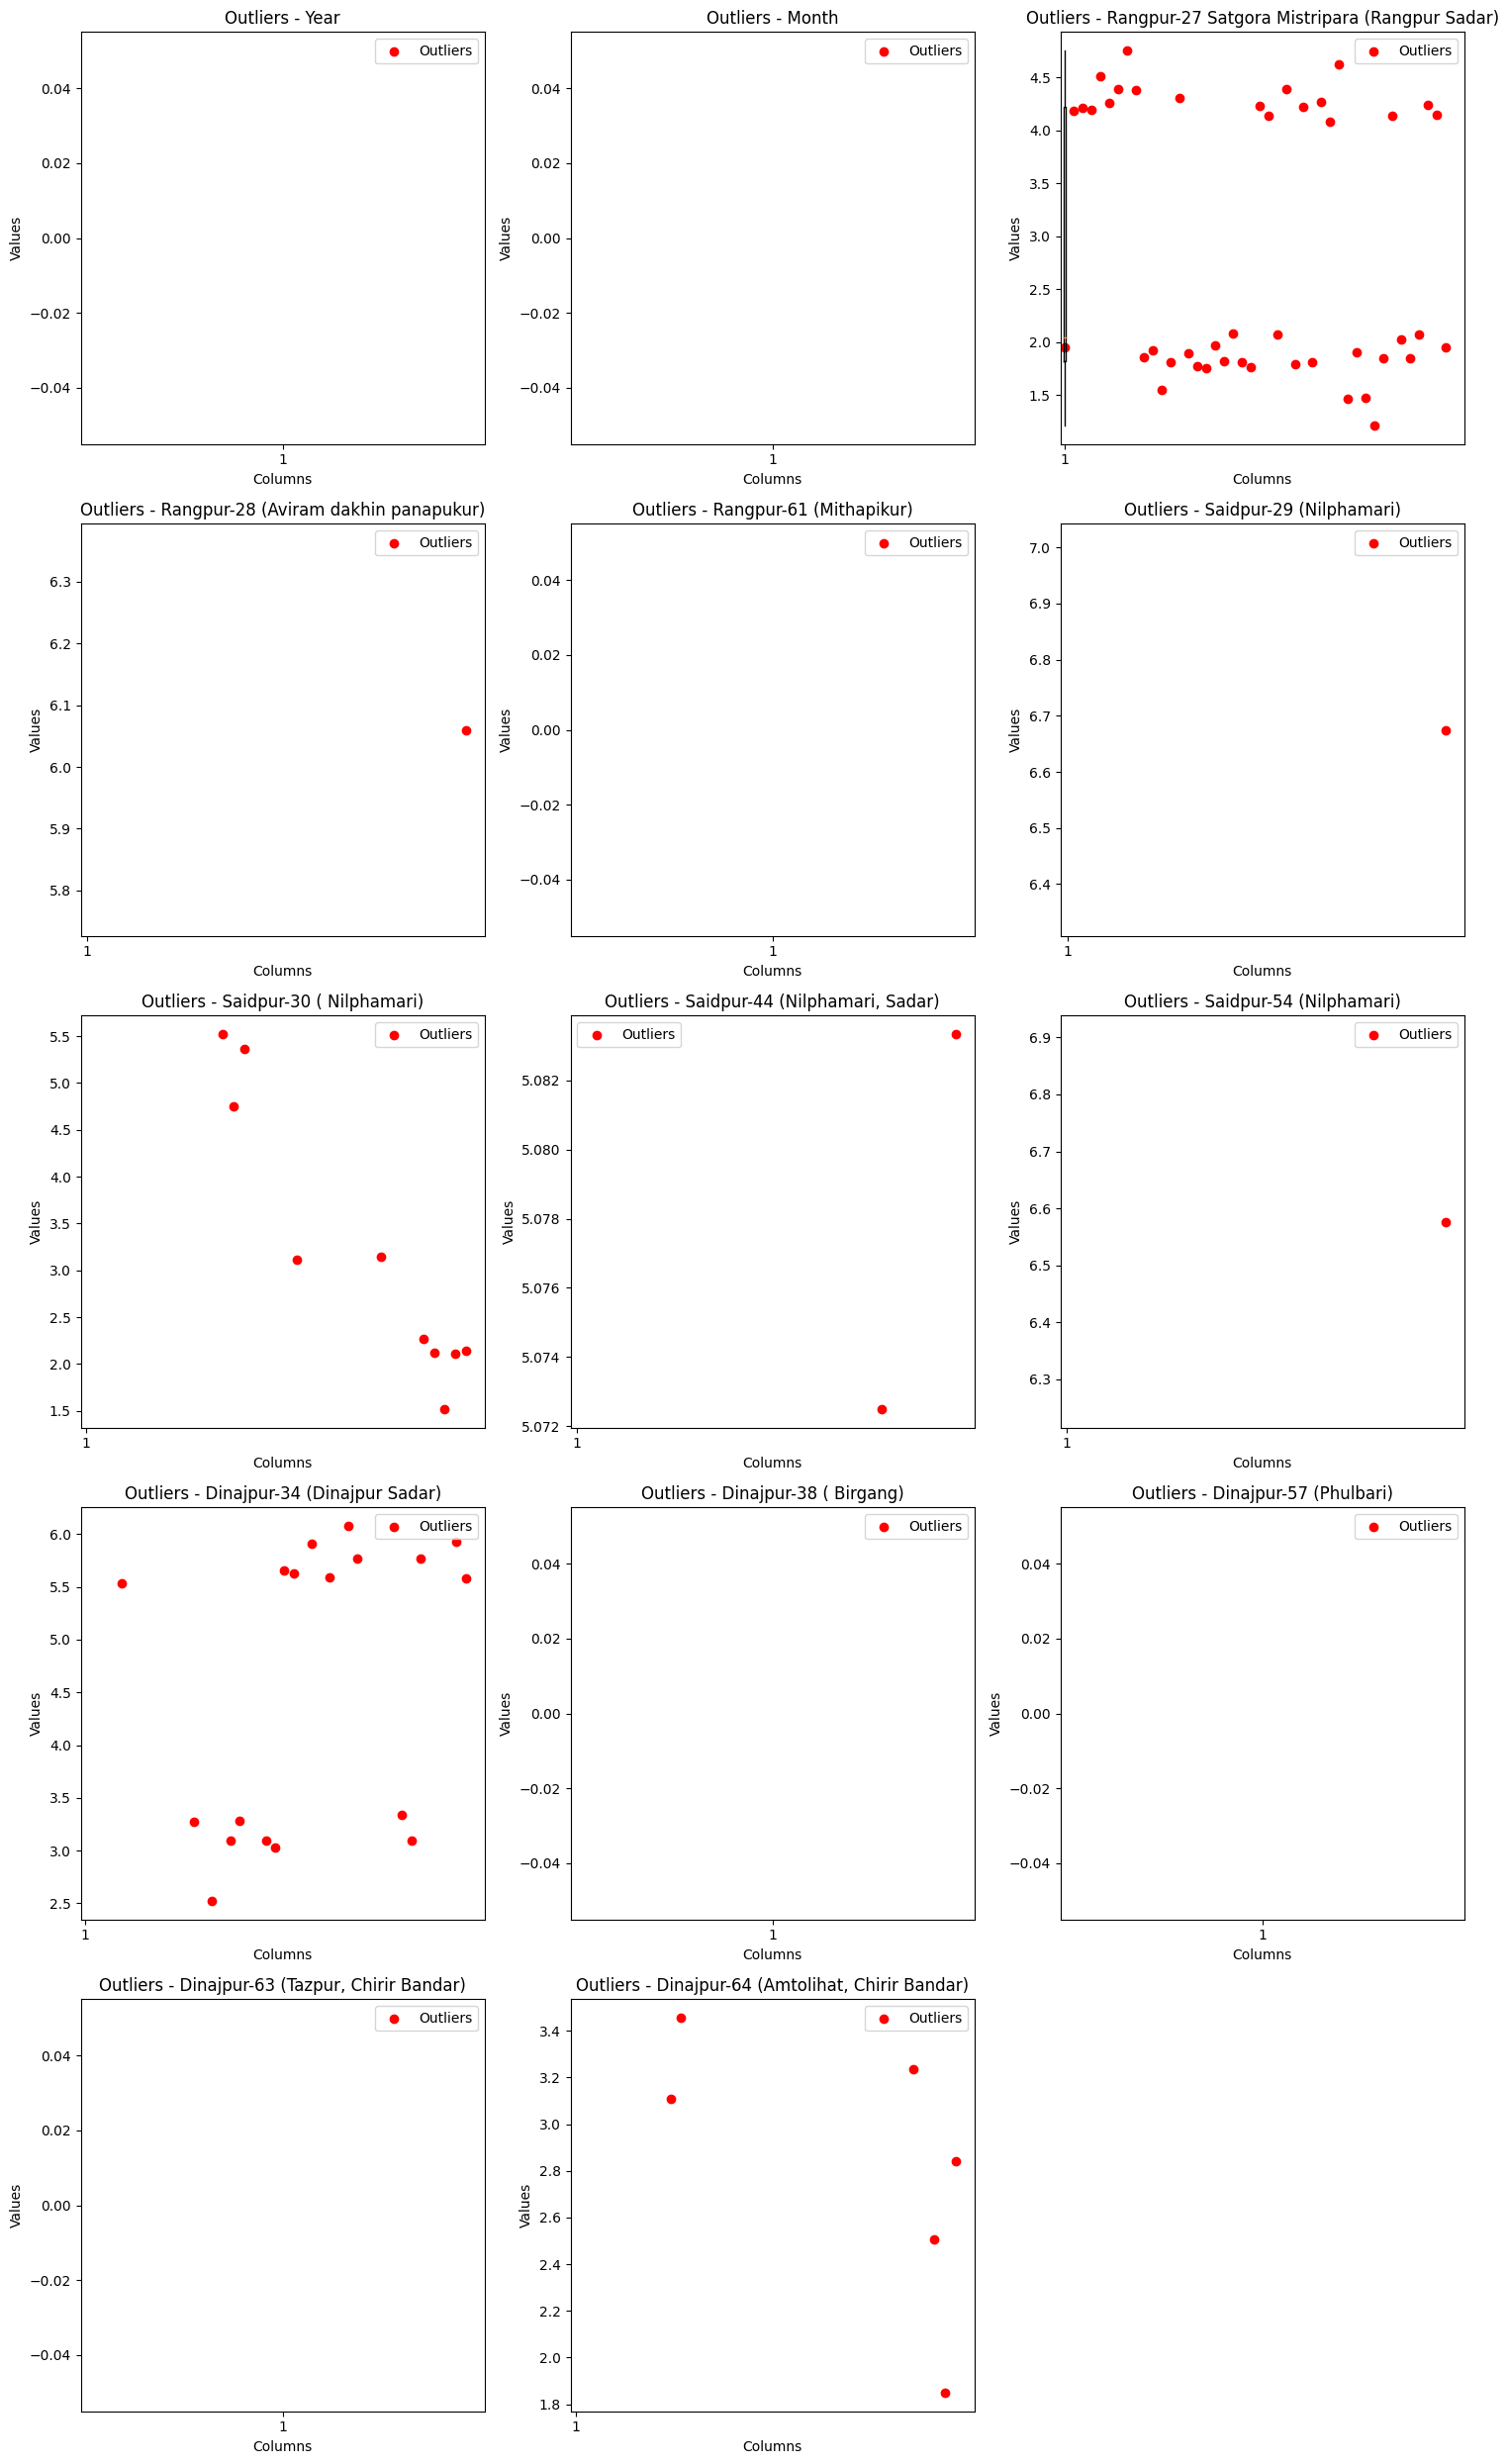

Number of total outliers: 140


In [30]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = GWL_df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = GWL_df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# Print the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

In [31]:
from plotting_library import*

# Checking if transformation is needed
check_transformation_needed(GWL_df)

Transformation recommended for column: Year
Transformation recommended for column: Month
Transformation recommended for column: Rangpur-27 Satgora Mistripara (Rangpur Sadar)
Transformation recommended for column: Rangpur-28 (Aviram dakhin panapukur)
Transformation recommended for column: Rangpur-61 (Mithapikur)
Transformation recommended for column: Saidpur-29 (Nilphamari)
Transformation recommended for column: Saidpur-30 ( Nilphamari)
Transformation recommended for column: Saidpur-44 (Nilphamari, Sadar)
Transformation recommended for column: Saidpur-54 (Nilphamari)
Transformation recommended for column: Dinajpur-34 (Dinajpur Sadar)
Transformation recommended for column: Dinajpur-38 ( Birgang)
Transformation recommended for column: Dinajpur-57 (Phulbari)
Transformation recommended for column: Dinajpur-63 (Tazpur, Chirir Bandar)
Transformation recommended for column: Dinajpur-64 (Amtolihat, Chirir Bandar)


In [ ]:
GWL_df
rainfall_df
temp_df
NDVI_df
IODSOINInaMEI_df